6.2 A

In [14]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
print(f'Training Data: x = {x_train.shape}, y = {y_train.shape}')
print(f'Testing Data:  x = {x_test.shape}, y = {y_test.shape}')

Training Data: x = (50000, 32, 32, 3), y = (50000, 1)
Testing Data:  x = (10000, 32, 32, 3), y = (10000, 1)


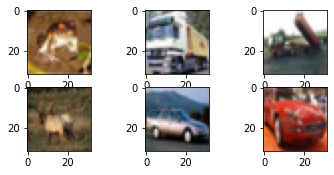

In [17]:
for i in range(6):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [18]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

print(f'Training Data: x = {x_train.shape}, y = {y_train.shape}')
print(f'Testing Data:  x = {x_test.shape}, y = {y_test.shape}')

Training Data: x = (50000, 32, 32, 3), y = (50000, 10)
Testing Data:  x = (10000, 32, 32, 3), y = (10000, 10)


In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
import skimage.transform
new_shape = (150,150,3)
x_train = [skimage.transform.resize(image, new_shape) for image in x_train]
x_test = [skimage.transform.resize(image, new_shape) for image in x_test]

In [24]:
import numpy as np
x_test = np.stack(x_test, axis=0)
x_train = np.stack(x_train, axis=0)

In [25]:
x_test.shape

(10000, 150, 150, 3)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
history = model.fit(
        datagen.flow(x_train, y_train, batch_size=20),
        steps_per_epoch=len(x_train) / 20,
        epochs=20,
        validation_data=datagen.flow(x_test, y_test, batch_size=20),
        validation_steps=len(x_test) / 20)

Epoch 1/20
2500/2500 [==============================] - 507s 202ms/step - loss: 2.1293 - acc: 0.2159 - val_loss: 1.7791 - val_acc: 0.3739
Epoch 2/20
2500/2500 [==============================] - 492s 197ms/step - loss: 1.7011 - acc: 0.3955 - val_loss: 1.5490 - val_acc: 0.4448
Epoch 3/20
2500/2500 [==============================] - 487s 195ms/step - loss: 1.5218 - acc: 0.4614 - val_loss: 1.4323 - val_acc: 0.4873
Epoch 4/20
2500/2500 [==============================] - 558s 223ms/step - loss: 1.4274 - acc: 0.4940 - val_loss: 1.4275 - val_acc: 0.4980
Epoch 5/20
2500/2500 [==============================] - 563s 225ms/step - loss: 1.3332 - acc: 0.5299 - val_loss: 1.3612 - val_acc: 0.5235
Epoch 6/20
2500/2500 [==============================] - 561s 225ms/step - loss: 1.2452 - acc: 0.5632 - val_loss: 1.2210 - val_acc: 0.5718
Epoch 7/20
2500/2500 [==============================] - 463s 185ms/step - loss: 1.1531 - acc: 0.5979 - val_loss: 1.1683 - val_acc: 0.5890
Epoch 8/20
2500/2500 [============

In [27]:
model.save('./results/model_6_2_a.h5')

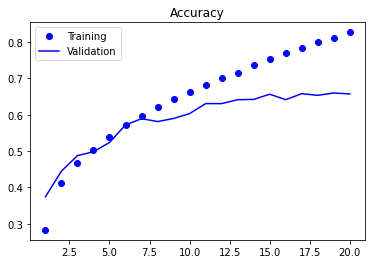

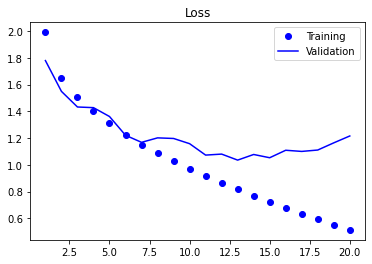

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

6.2 B

In [29]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              #optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255)

history = model.fit(
        train_datagen.flow(x_train, y_train, batch_size=20),
        steps_per_epoch=len(x_train) / 20,
        epochs=20,
        validation_data=test_datagen.flow(x_test, y_test, batch_size=20),
        validation_steps=len(x_test) / 20)

Epoch 1/20
2500/2500 [==============================] - 550s 220ms/step - loss: 2.2084 - acc: 0.1697 - val_loss: 1.9432 - val_acc: 0.3027
Epoch 2/20
2500/2500 [==============================] - 560s 224ms/step - loss: 2.0090 - acc: 0.2616 - val_loss: 1.8246 - val_acc: 0.3445
Epoch 3/20
2500/2500 [==============================] - 664s 266ms/step - loss: 1.9051 - acc: 0.3063 - val_loss: 1.6530 - val_acc: 0.4125
Epoch 4/20
2500/2500 [==============================] - 649s 260ms/step - loss: 1.8173 - acc: 0.3353 - val_loss: 1.5747 - val_acc: 0.4356
Epoch 5/20
2500/2500 [==============================] - 618s 247ms/step - loss: 1.7556 - acc: 0.3607 - val_loss: 1.5001 - val_acc: 0.4676
Epoch 6/20
2500/2500 [==============================] - 608s 243ms/step - loss: 1.7165 - acc: 0.3792 - val_loss: 1.4776 - val_acc: 0.4703
Epoch 7/20
2500/2500 [==============================] - 677s 271ms/step - loss: 1.6852 - acc: 0.3881 - val_loss: 1.4471 - val_acc: 0.4873
Epoch 8/20
2500/2500 [============

In [31]:
model.save('./results/model_6_2_b.h5')

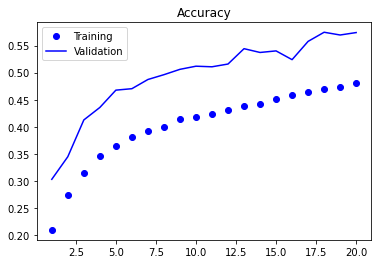

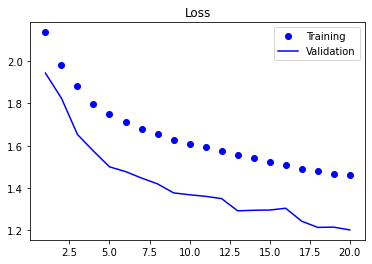

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation')
plt.title('Loss')
plt.legend()

plt.show()